In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import chi2

df = pd.read_pickle('treino.pkl.gz')

In [2]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (20, 8)

In [3]:
# como temos 82 diferentes valores, acho que faz sentido manter apenas as mais frequentes e colocar as outras
# sob o nome 'outros'

print('valores:', len(df['agencia'].unique()), '\n', df['agencia'].value_counts())

valores: 82 
 2      10481
67      9116
3       7419
5       7396
36      7058
       ...  
261      141
217      140
84       124
111       70
158       50
Name: agencia, Length: 82, dtype: int64


In [4]:
def categorize_agency(x, top_indexes):
    if x in top_indexes:
        return str(x)
    else:
        return 'other'
    
top_agency_indexes = df['agencia'].value_counts().head(19).index.tolist()    
df['agencia'] = df['agencia'].apply(lambda x: categorize_agency(x, top_agency_indexes))

In [6]:
# função para plot de frequência de 'default', de acordo com valore de determinada series
def plot_default_freq(dataframe, series_name, integer = False):
    
    vals = []
    df_aux = dataframe.copy()
    
    if integer == True:    
        df_aux[series_name] = df_aux[series_name].astype(int)
        for val in df_aux[series_name].unique():
            vals.append(val)
        vals.sort()
        df_aux[series_name] = df_aux[series_name].astype(str)
        
    if integer == False:
        for val in df_aux[series_name].unique():
            vals.append(val)
            
    data_list = []
    for value in vals:
        exec("df_{0} = df_aux.loc[df_aux[series_name] == '{0}']".format(value))
        exec("data_list.append(df_{0})".format(value))
    
    pos = 0
    for data in data_list:
        plt.bar([pos], [len(data)], color = 'green')
        plt.bar([pos], [len(data[data['default'] == 1])], color = 'red')
        pos += 1
        
    plt.xticks(range(len(vals)), vals)
    plt.xticks(rotation = 45)
    plt.yticks([])
    plt.show()

In [33]:
def target_prop_bin(dataframe, series_name, target):
    
    plot_data = []
    for i in dataframe[series_name].unique():
        data = dataframe.loc[dataframe[series_name] == i, target].value_counts(1)
        if len(data) == 2:
            plot_data.append([str(i), data.iloc[1]])
        if len(data) < 2:
            plot_data.append([str(i), data.iloc[0]])
            

    plot_data.sort()
    for i in plot_data:
        plt.bar(i[0], i[1], color = 'turquoise')
        
    plt.xticks(range(len(plot_data)), [i[0] for i in plot_data])
    plt.xticks(rotation = 45)
    plt.yticks([])
    plt.show()


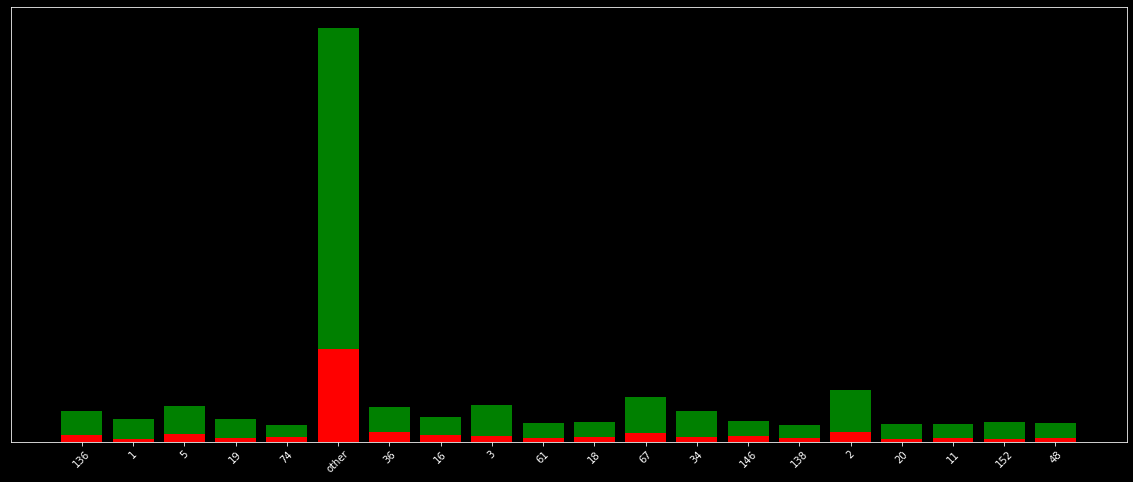

In [7]:
plot_default_freq(df, 'agencia', integer = False)

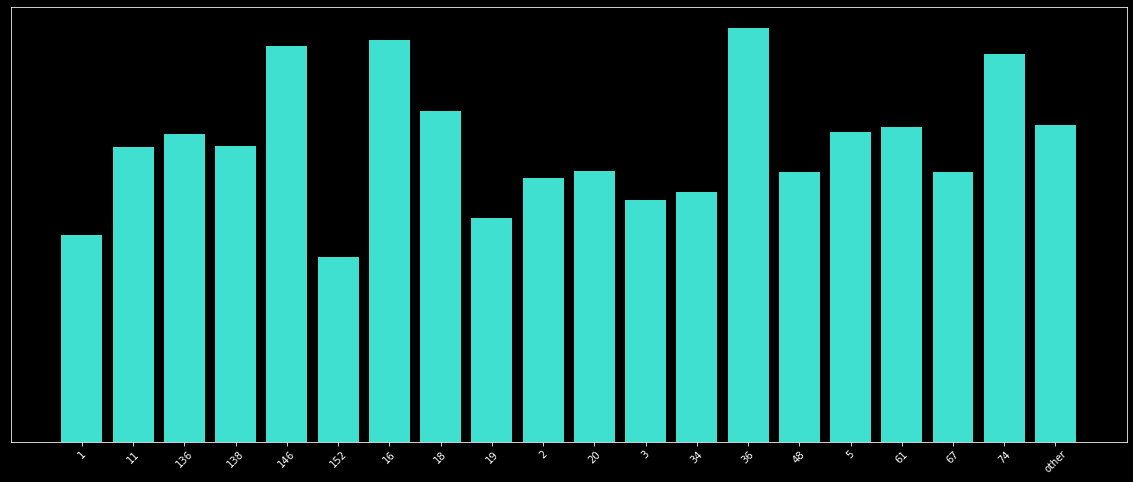

In [34]:
target_prop_bin(df, 'agencia', 'default')

In [30]:
def quali_var_indep_hyp_test(dataframe, series_name, target, alpha):
    stat, pval, dof, exp = chi2_contingency(pd.crosstab(dataframe[series_name], dataframe[target]))
    crit = chi2.ppf(q = (1 - alpha), df = dof)
    if stat >= crit:
        cramer = np.sqrt( ( stat ) / sum(sum(exp)) * (min(exp.shape) - 1) )
    else:
        cramer = None
    return stat, crit, cramer

In [32]:
quali_var_indep_hyp_test(df, 'agencia', 'default', 0.05)

(1263.2430182909898, 30.14352720564616, 0.08229572154460171)